In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
data=pd.read_csv("/content/safety_monitoring.csv")

In [ ]:
data

,Device-ID/User-ID,Timestamp,Movement Activity,Fall Detected (Yes/No),Impact Force Level,Post-Fall Inactivity Duration (Seconds),Location,Alert Triggered (Yes/No),Caregiver Notified (Yes/No),Unnamed: 9
0,D1000,1/7/2025 16:04,No Movement,No,-,0,Kitchen,No,No,NaN
1,D1001,1/20/2025 15:45,Lying,No,-,0,Living Room,No,No,NaN
2,D1002,1/2/2025 2:42,No Movement,No,-,0,Bedroom,No,No,NaN
3,D1003,1/1/2025 22:36,Lying,No,-,0,Kitchen,No,No,NaN
4,D1004,1/3/2025 16:30,No Movement,No,-,0,Bedroom,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...
9995,D10995,1/22/2025 11:29,Sitting,No,-,0,Bathroom,No,No,NaN
9996,D10996,1/14/2025 9:37,Sitting,No,-,0,Kitchen,No,No,NaN
9997,D10997,1/1/2025 17:08,Sitting,No,-,0,Bathroom,No,No,NaN
9998,D10998,1/6/2025 20:20,Sitting,No,-,0,Bathroom,No,No,NaN


In [3]:
#dropping the columns which are not needed..
data=data.iloc[:,2:8]

In [4]:
data

,Movement Activity,Fall Detected (Yes/No),Impact Force Level,Post-Fall Inactivity Duration (Seconds),Location,Alert Triggered (Yes/No)
0,No Movement,No,-,0,Kitchen,No
1,Lying,No,-,0,Living Room,No
2,No Movement,No,-,0,Bedroom,No
3,Lying,No,-,0,Kitchen,No
4,No Movement,No,-,0,Bedroom,No
...,...,...,...,...,...,...
9995,Sitting,No,-,0,Bathroom,No
9996,Sitting,No,-,0,Kitchen,No
9997,Sitting,No,-,0,Bathroom,No
9998,Sitting,No,-,0,Bathroom,No


In [5]:
#impact force level column has "-" ,replacing it with "Negligible"
data["Impact Force Level"] = data["Impact Force Level"].replace("-", "Negligible")

In [ ]:
data

,Movement Activity,Fall Detected (Yes/No),Impact Force Level,Post-Fall Inactivity Duration (Seconds),Location,Alert Triggered (Yes/No)
0,No Movement,No,Negligible,0,Kitchen,No
1,Lying,No,Negligible,0,Living Room,No
2,No Movement,No,Negligible,0,Bedroom,No
3,Lying,No,Negligible,0,Kitchen,No
4,No Movement,No,Negligible,0,Bedroom,No
...,...,...,...,...,...,...
9995,Sitting,No,Negligible,0,Bathroom,No
9996,Sitting,No,Negligible,0,Kitchen,No
9997,Sitting,No,Negligible,0,Bathroom,No
9998,Sitting,No,Negligible,0,Bathroom,No


In [6]:
data = data.dropna(subset=['Alert Triggered (Yes/No)'])

In [ ]:
data

,Movement Activity,Fall Detected (Yes/No),Impact Force Level,Post-Fall Inactivity Duration (Seconds),Location,Alert Triggered (Yes/No)
0,No Movement,No,Negligible,0,Kitchen,No
1,Lying,No,Negligible,0,Living Room,No
2,No Movement,No,Negligible,0,Bedroom,No
3,Lying,No,Negligible,0,Kitchen,No
4,No Movement,No,Negligible,0,Bedroom,No
...,...,...,...,...,...,...
9995,Sitting,No,Negligible,0,Bathroom,No
9996,Sitting,No,Negligible,0,Kitchen,No
9997,Sitting,No,Negligible,0,Bathroom,No
9998,Sitting,No,Negligible,0,Bathroom,No


**Encoding specific columns..**

In [7]:
movement_encoded = pd.get_dummies(data["Movement Activity"], prefix="Movement", drop_first=True)

In [8]:
fall_encoded = pd.get_dummies(data["Fall Detected (Yes/No)"], prefix="Fall", drop_first=True)

In [9]:
impact_encoded = pd.get_dummies(data["Impact Force Level"], prefix="Impact", drop_first=True)

In [10]:
data["Alert Triggered (Yes/No)"] = data["Alert Triggered (Yes/No)"].map({"Yes": 1, "No": 0})

In [11]:
data

,Movement Activity,Fall Detected (Yes/No),Impact Force Level,Post-Fall Inactivity Duration (Seconds),Location,Alert Triggered (Yes/No)
0,No Movement,No,Negligible,0,Kitchen,0
1,Lying,No,Negligible,0,Living Room,0
2,No Movement,No,Negligible,0,Bedroom,0
3,Lying,No,Negligible,0,Kitchen,0
4,No Movement,No,Negligible,0,Bedroom,0
...,...,...,...,...,...,...
9995,Sitting,No,Negligible,0,Bathroom,0
9996,Sitting,No,Negligible,0,Kitchen,0
9997,Sitting,No,Negligible,0,Bathroom,0
9998,Sitting,No,Negligible,0,Bathroom,0


In [12]:
final_data = pd.concat([movement_encoded, fall_encoded, impact_encoded, data["Alert Triggered (Yes/No)"]], axis=1)

In [ ]:
final_data

,Movement_No Movement,Movement_Sitting,Movement_Walking,Fall_Yes,Impact_Low,Impact_Medium,Impact_Negligible,Alert Triggered (Yes/No)
0,True,False,False,False,False,False,True,0
1,False,False,False,False,False,False,True,0
2,True,False,False,False,False,False,True,0
3,False,False,False,False,False,False,True,0
4,True,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...
9995,False,True,False,False,False,False,True,0
9996,False,True,False,False,False,False,True,0
9997,False,True,False,False,False,False,True,0
9998,False,True,False,False,False,False,True,0


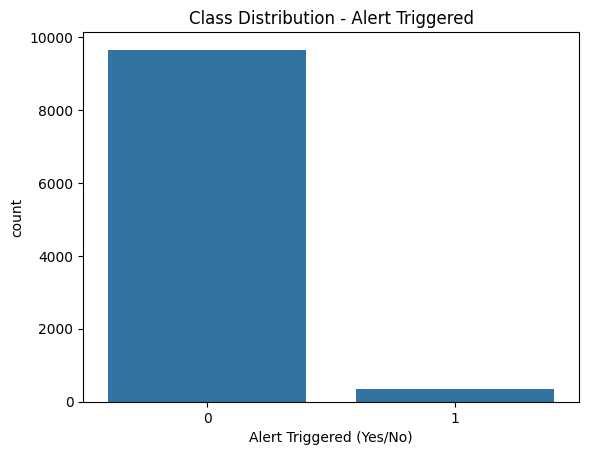

In [13]:
sns.countplot(data=final_data, x="Alert Triggered (Yes/No)")
plt.title("Class Distribution - Alert Triggered")
plt.show()

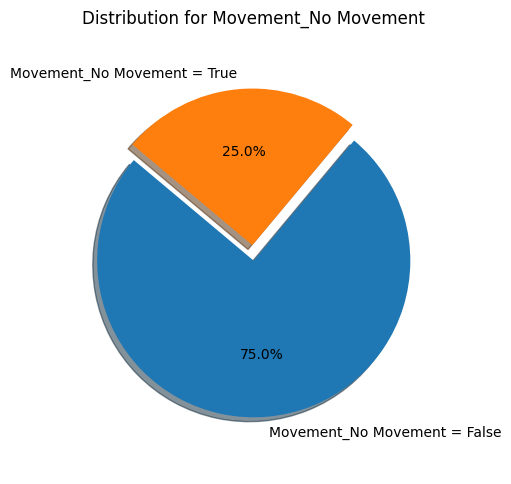

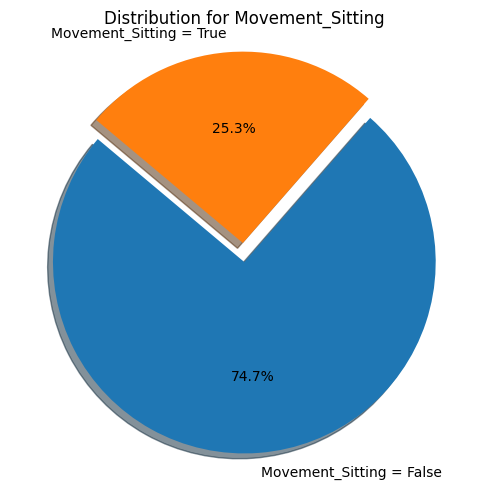

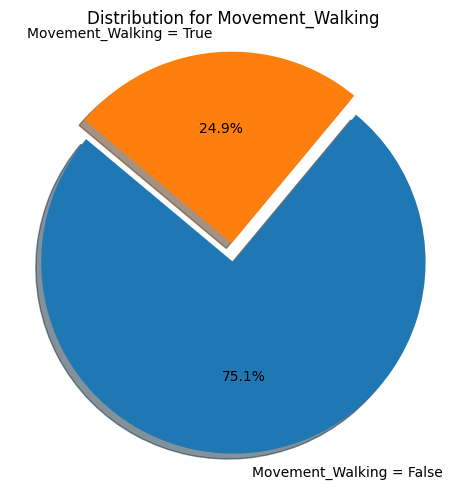

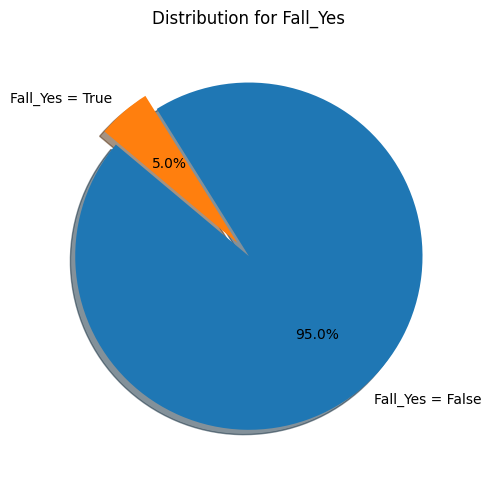

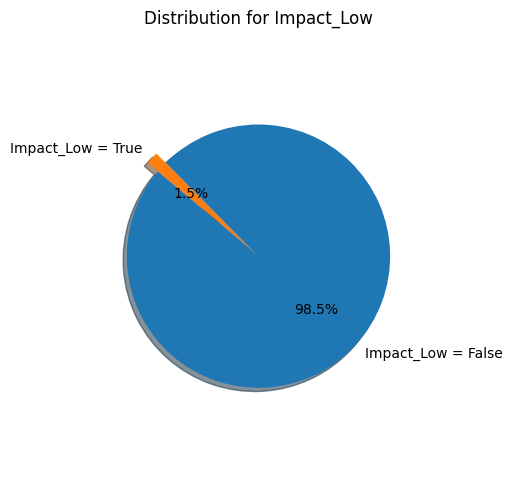

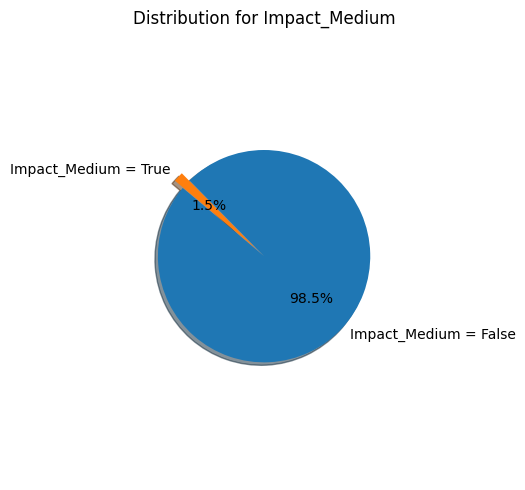

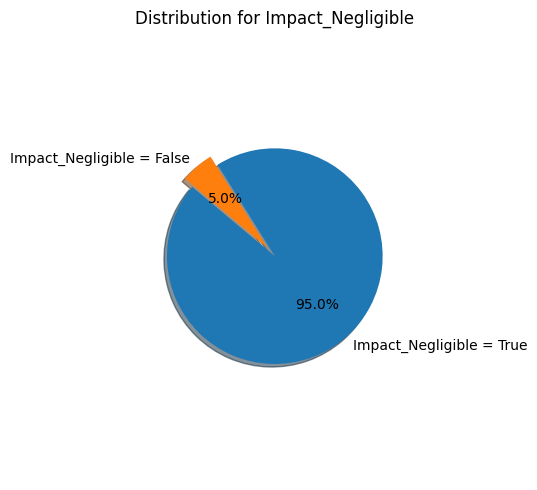

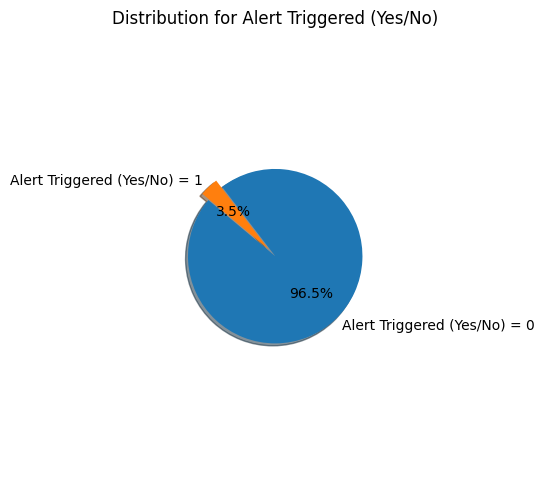

In [14]:
columns_to_plot = [
    "Movement_No Movement",
    "Movement_Sitting",
    "Movement_Walking",
    "Fall_Yes",
    "Impact_Low",
    "Impact_Medium",
    "Impact_Negligible",
    "Alert Triggered (Yes/No)"
]

# Plot pie charts
for col in columns_to_plot:
    counts = final_data[col].value_counts()
    labels = [f"{col} = {val}" for val in counts.index]

    # Plot
    plt.figure(figsize=(5, 5))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, explode=[0.05]*len(counts), shadow=True)
    plt.title(f"Distribution for {col}")
    plt.axis("equal")
    plt.tight_layout()
    plt.show()

**Extract the features and split the data for training and testing..**

In [15]:
X = final_data.drop("Alert Triggered (Yes/No)", axis=1)
y = final_data["Alert Triggered (Yes/No)"]

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 7)
(2000, 7)
(8000,)
(2000,)



📊 Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1930
           1       1.00      1.00      1.00        70

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


📊 Classification Report for SVM:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1930
           1       1.00      1.00      1.00        70

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


📊 Classification Report for KNN:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1930
           1       1.00      1.00      1.00        70

    accuracy                           1.00      2000
   macr

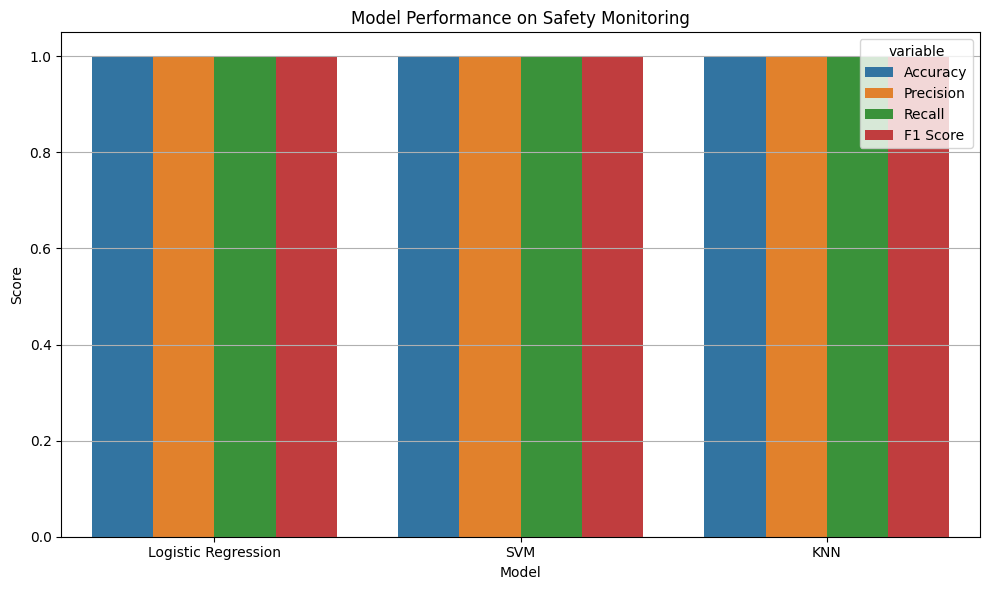

In [18]:


# Define models
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=8000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Store performance
results = []

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

    print(f"\n📊 Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="value", hue="variable",
            data=pd.melt(results_df, id_vars=["Model"], value_vars=["Accuracy", "Precision", "Recall", "F1 Score"]))
plt.title("Model Performance on Safety Monitoring")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

**The current dataset had a huge imbalance for the "Alert" column where only about 349 "Yes" were present out of the 10000 values.**

In [20]:
from sklearn.utils import resample

# Combine X and y
combined = pd.concat([X, y], axis=1)

# Split into majority and minority
majority = combined[combined['Alert Triggered (Yes/No)'] == 0]
minority = combined[combined['Alert Triggered (Yes/No)'] == 1]

# Downsample majority
majority_downsampled = resample(majority,
                                replace=False,
                                n_samples=len(minority),
                                random_state=42)

# Combine back
balanced = pd.concat([majority_downsampled, minority])

# Shuffle and split
X_bal = balanced.drop('Alert Triggered (Yes/No)', axis=1)
y_bal = balanced['Alert Triggered (Yes/No)']


<ipython-input-21-53370e8556a2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_bal, palette='Set3')


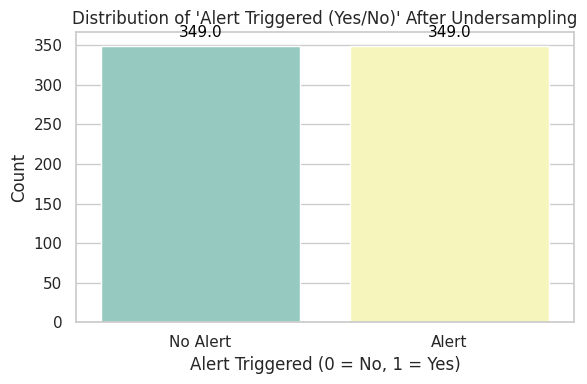

In [21]:
# Set the style
sns.set(style="whitegrid")

# Create a countplot
plt.figure(figsize=(6, 4))
sns.countplot(x=y_bal, palette='Set3')

# Annotate the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='black',
                       xytext=(0, 10), textcoords='offset points')

# Labels and title
plt.title("Distribution of 'Alert Triggered (Yes/No)' After Undersampling")
plt.xlabel("Alert Triggered (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ['No Alert', 'Alert'])
plt.tight_layout()
plt.show()

🔍 Model Performance Metrics:

Logistic Regression:
  ✅ Accuracy:  0.9929
  🎯 Precision: 0.9859
  🔁 Recall:    1.0000
  🧮 F1 Score:  0.9929

SVM:
  ✅ Accuracy:  1.0000
  🎯 Precision: 1.0000
  🔁 Recall:    1.0000
  🧮 F1 Score:  1.0000

KNN:
  ✅ Accuracy:  1.0000
  🎯 Precision: 1.0000
  🔁 Recall:    1.0000
  🧮 F1 Score:  1.0000

Random Forest:
  ✅ Accuracy:  1.0000
  🎯 Precision: 1.0000
  🔁 Recall:    1.0000
  🧮 F1 Score:  1.0000



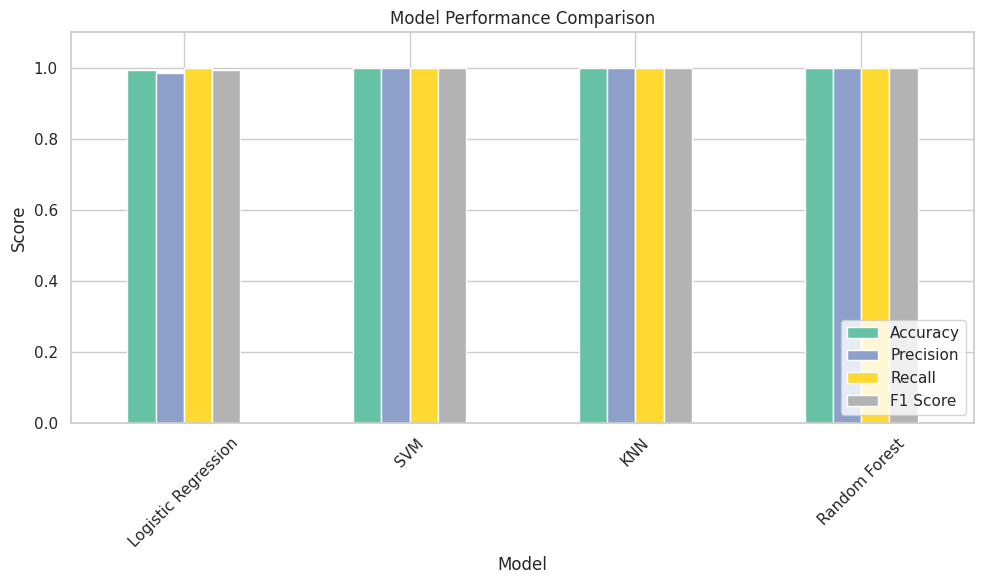

In [22]:
# Split the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, stratify=y_bal, random_state=42)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Store performance
results = []

print("🔍 Model Performance Metrics:\n")

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{name}:")
    print(f"  ✅ Accuracy:  {acc:.4f}")
    print(f"  🎯 Precision: {prec:.4f}")
    print(f"  🔁 Recall:    {rec:.4f}")
    print(f"  🧮 F1 Score:  {f1:.4f}\n")

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# Create DataFrame of results
results_df = pd.DataFrame(results)

# Plot the results
results_df.set_index("Model").plot(kind='bar', figsize=(10, 6), colormap="Set2")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [23]:
# 🔄 User Input for Prediction
movement = input("Enter Movement Type (No Movement / Sitting / Walking): ").strip().title()
fall = input("Fall Detected? (Yes / No): ").strip().title()
impact = input("Impact Level (Low / Medium / Negligible): ").strip().title()

# 🎯 One-hot encode based on expected features
user_input = {
    'Movement_No Movement': 1 if movement == "No Movement" else 0,
    'Movement_Sitting': 1 if movement == "Sitting" else 0,
    'Movement_Walking': 1 if movement == "Walking" else 0,
    'Fall_Yes': 1 if fall == "Yes" else 0,
    'Impact_Low': 1 if impact == "Low" else 0,
    'Impact_Medium': 1 if impact == "Medium" else 0,
    'Impact_Negligible': 1 if impact == "Negligible" else 0,
}

# 🔢 Convert to DataFrame
user_df = pd.DataFrame([user_input])

# 🧠 Predict using all models
print("\n🔍 Individual Model Predictions:")
votes = []

for name, model in classifiers.items():
    pred = model.predict(user_df)[0]
    result = "⚠️ ALERT" if pred == 1 else "✅ SAFE"
    print(f"{name}: {result}")
    votes.append(pred)

# 🗳️ Majority Voting
final_vote = 1 if votes.count(1) > votes.count(0) else 0
print("\n📊 Final Consensus (Majority Vote):", "⚠️ ALERT" if final_vote == 1 else "✅ SAFE")


KeyboardInterrupt: Interrupted by user

**Saving the models as pkl files **

In [26]:
import pickle

# Save each classifier
for name, model in classifiers.items():
    filename = f"{name.replace(' ', '_').lower()}_model.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"✅ Saved: {filename}")

✅ Saved: logistic_regression_model.pkl
✅ Saved: svm_model.pkl
✅ Saved: knn_model.pkl
✅ Saved: random_forest_model.pkl
